In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Correct file name from the dataset
file_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "pavansubhasht/ibm-hr-analytics-attrition-dataset",
    file_path
)

C:\Users\HP\AppData\Local\Temp\ipykernel_9240\2451187348.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [32]:
print(df["StockOptionLevel"].value_counts())

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64


In [40]:
df_encoded = df.copy()
label_cols = ["Attrition", "Gender", "OverTime"]

le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

multi_cat_cols = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
df_encoded = pd.get_dummies(df_encoded, columns=multi_cat_cols, drop_first=True)
df_encoded = df_encoded.drop("Over18",axis=1)

In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   Gender                             1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                           1470 non-null   int64
 12  JobSatisfaction     

In [46]:
X = df_encoded.drop("Attrition", axis=1)
Y = df_encoded["Attrition"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [49]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled,Y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

In [54]:
print("Logistic Regression Accuracy:",accuracy_score(Y_test, y_pred_lr))
print("Random Forest Classification Accuracy:",accuracy_score(Y_test, y_pred_rf))

Logistic Regression Accuracy: 0.8741496598639455
Random Forest Classification Accuracy: 0.8401360544217688


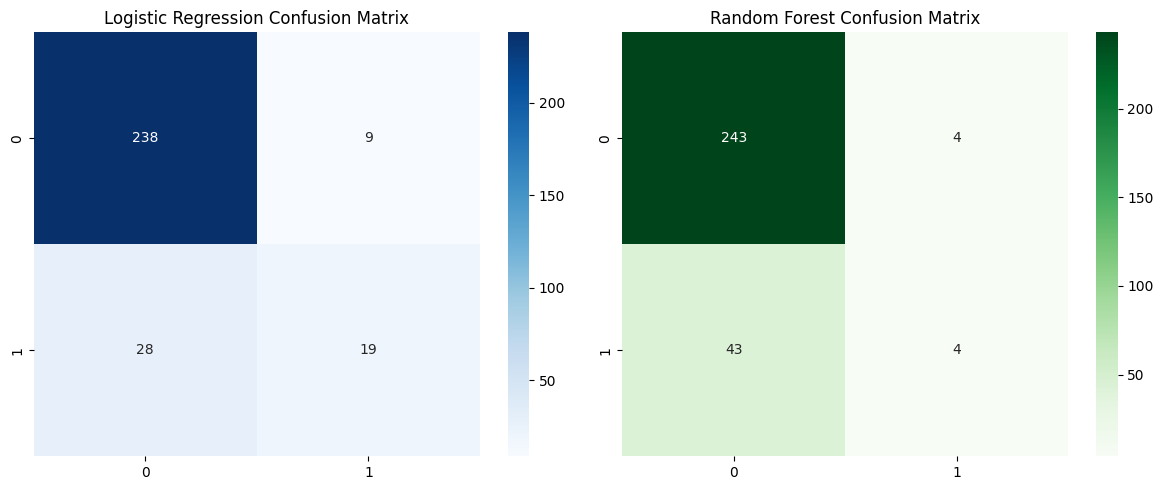

In [64]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_test, y_pred_lr),annot=True,fmt="d", cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Y_test, y_pred_rf),annot=True,fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

In [68]:
print("Logistic Regression Classification Report: \n",classification_report(Y_test, y_pred_lr))
print("Random Forest Classification Report: \n",classification_report(Y_test, y_pred_rf))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.68      0.40      0.51        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.72       294
weighted avg       0.86      0.87      0.86       294

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294



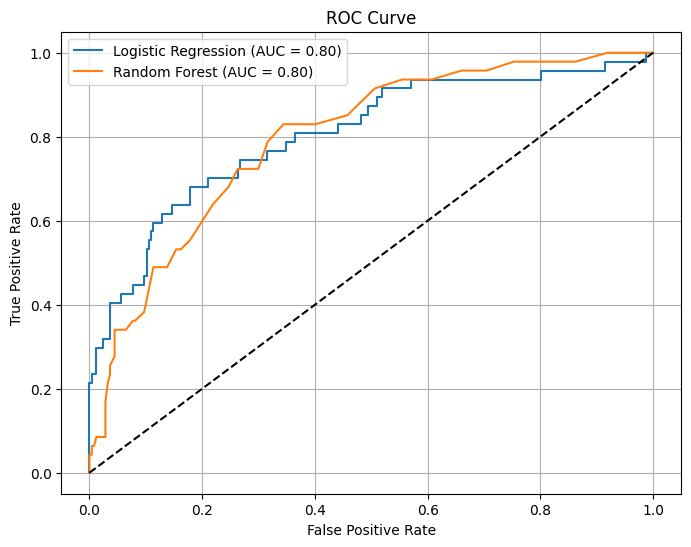

In [77]:
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

fpr_lr, tpr_lr, thrshold_lr = roc_curve(Y_test, y_prob_lr)
fpr_rf, tpr_rf, thrshold_rf = roc_curve(Y_test, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()